In [1]:
## https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

<img src="https://i.postimg.cc/ydZcb9cY/Hello.jpg">

<img src="https://i.postimg.cc/W4208kV2/inkpx-word-art-1.jpg">

<img src='https://i.postimg.cc/3wzWvF4d/3101522.jpg'>

<div style="border:4px solid navy; border-radius:30px; padding: 15px; background-size: cover">
<p><h2 style="color:navy; font-size:250%"><b>INTRODUCTION</b></h2></p>

<p><h5 style="font-size:130%; font-family:Arial ">The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.</h5></p>

# <b><p style="background-image: url(https://i.postimg.cc/MpTLFhtf/wp9806504-network-desktop-wallpapers.jpg);background-size: cover;font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Table Of Content</p></b>

<a id="content"></a>    
<div style="border-radius:20px; padding: 15px; font-size:110%; text-align:left; background-image: url(https://i.postimg.cc/sXwGWcwC/download.jpg); background-size: cover">

<h2><span style="text-align:center; font-weight:bolder; color:navy; font-size:130%">Table of Contents:</span></h2>

 * **[Step 1 | Python Libraries](#setup)**
    -  [1.1 | Import Libraries](#import)
    -  [1.2 | Library configurations](#config)
 *  **[Step 2 | Data](#data)**
    -  [2.1 | Importing Data](#load_data)
    -  [2.2 | Data Informations](#info)
    -  [2.3 | Features](#features)
 *  **[Step 3 | visualizations](#visualizations)**
    -  [3.1 | Plots](#plots)
    -  [3.2 | Correlations](#corr)
 *  **[Step 4 | Preprocessing](#prep)**
    -  [4.1 | Value](#value)
    -  [4.2 | Define X ,y](#xy)
    -  [4.3 | Normalization](#norm)
 *  **[Step 5 | Modeling](#ml)**
    -  [5.1 | LinearRegression](#lr)
    -  [5.2 | DecisionTreeRegressor](#tree)
    -  [5.3 | RandomForestRegressor](#rf)
    -  [5.6 | Result](#result)
 *  **[Author](#author)**

<a id="setup"></a>
# <b><p style="background-image: url(https://i.postimg.cc/MpTLFhtf/wp9806504-network-desktop-wallpapers.jpg);background-size: cover;font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 1 | Python Libraries</p></b>

[🏠 Tabel of Contents](#content)

<a id="import"></a>
## <b><span style="color:navy">✈️ Step 1.1 | </span><span style="color:red">Import Libraries</span></b>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

print(colored('\nAll libraries imported succesfully', 'green'))


All libraries imported succesfully


<a id="config"></a>
## <b><span style="color:navy">✈️ Step 1.2 | </span><span style="color:red">Library configurations</span></b>

In [3]:
pd.options.mode.copy_on_write = True # Allow re-write on variable
sns.set_style('darkgrid') # Seaborn style
warnings.filterwarnings('ignore') # Ignore warnings
pd.set_option('display.max_columns', None) # Setting this option will print all collumns of a dataframe
pd.set_option('display.max_colwidth', None) # Setting this option will print all of the data in a feature

In [4]:
print(colored('\nAll libraries Configed succesfully.', 'green'))


All libraries Configed succesfully.


<a id="data"></a>
# <b><p style="background-image: url(https://i.postimg.cc/MpTLFhtf/wp9806504-network-desktop-wallpapers.jpg);background-size: cover;font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 2 | Data</p></b>

[🏠 Tabel of Contents](#content)

<a id="load_data"></a>
## <b><span style="color:navy">✈️ Step 2.1 | </span><span style="color:red">Importing Data</span></b>

In [5]:
data = pd.read_csv('Clean_Dataset.csv')
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


<a id="info"></a>
## <b><span style="color:navy">✈️ Step 2.2 | </span><span style="color:red">Data Informations</span></b>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [7]:
data.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

<div style="font-size:110%; font-weight:500; background-color:#d3def0">➡️ There is no null value.</div>

<div style="font-size:110%; font-weight:500; background-color:#d3def0">➡️ Drop <code>unnamed: 0</code> column.</div>

In [8]:
data.drop(columns='Unnamed: 0', inplace=True)

<div style="font-size:110%; font-weight:500; background-color:#d3def0">➡️ Rename class name to flight_class, Because class is python reserved name.</div>

In [9]:
data.rename(columns={'class': 'flight_class'}, inplace=True)

<a id="features"></a>
## <b><span style="color:navy">✈️ Step 2.3 | </span><span style="color:red">Features</span></b>

<div style="border:3px solid navy; border-radius:30px; padding: 15px; background-size: cover">
<p><h2 style="color:navy; font-size:250%"><b>FEATURES</b></h2></p>


<p><h5 style="font-size:130%; font-family:Arial ">The various features of the cleaned dataset are explained below:
    
<h4><b>1) Airline: </b></h4>
<p><h5 style="font-size:110%; font-family:Arial ">The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.</h5></p>
<h4><b>2) Flight: </b></h4>
<p><h5 style="font-size:110%; font-family:Arial ">Flight stores information regarding the plane's flight code. It is a categorical feature.</h5></p>
<h4><b>3) Source City: </b></h4>
<p><h5 style="font-size:110%; font-family:Arial ">City from which the flight takes off. It is a categorical feature having 6 unique cities.</h5></p>
<h4><b>4) Departure Time: </b></h4>
<p><h5 style="font-size:110%; font-family:Arial ">This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.</h5></p>
<h4><b>5) Stops: </b></h4>
<p><h5 style="font-size:110%; font-family:Arial ">A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.</h5></p>
<h4><b>6) Arrival Time: </b></h4>
<p><h5 style="font-size:110%; font-family:Arial ">This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.</h5></p>
<h4><b>7) Destination City: </b></h4>
<p><h5 style="font-size:110%; font-family:Arial ">City where the flight will land. It is a categorical feature having 6 unique cities.</h5></p>
<h4><b>8) Class: </b></h4>
<p><h5 style="font-size:110%; font-family:Arial ">A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.</h5></p>
<h4><b>9) Duration: </b></h4>
<p><h5 style="font-size:110%; font-family:Arial ">A continuous feature that displays the overall amount of time it takes to travel between cities in hours.</h5></p>
<h4><b>10)Days Left: </b></h4>
<p><h5 style="font-size:110%; font-family:Arial ">This is a derived characteristic that is calculated by subtracting the trip date by the booking date.</h5></p>
<h4><b>11) Price: </b></h4>
<p><h5 style="font-size:110%; font-family:Arial ">Target variable stores information of the ticket price.</h5></p>

<a id="visualizations"></a>
# <b><p style="background-image: url(https://i.postimg.cc/MpTLFhtf/wp9806504-network-desktop-wallpapers.jpg);background-size: cover;font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 3 | visualizations</p></b>

[🏠 Tabel of Contents](#content)

<a id="plots"></a>
## <b><span style="color:navy">✈️ Step 3.1 | </span><span style="color:red">Plots</span></b>

In [10]:
for index, value in enumerate(data.columns) :
    print(index, ":", value)

0 : airline
1 : flight
2 : source_city
3 : departure_time
4 : stops
5 : arrival_time
6 : destination_city
7 : flight_class
8 : duration
9 : days_left
10 : price


### airline

In [11]:
data.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

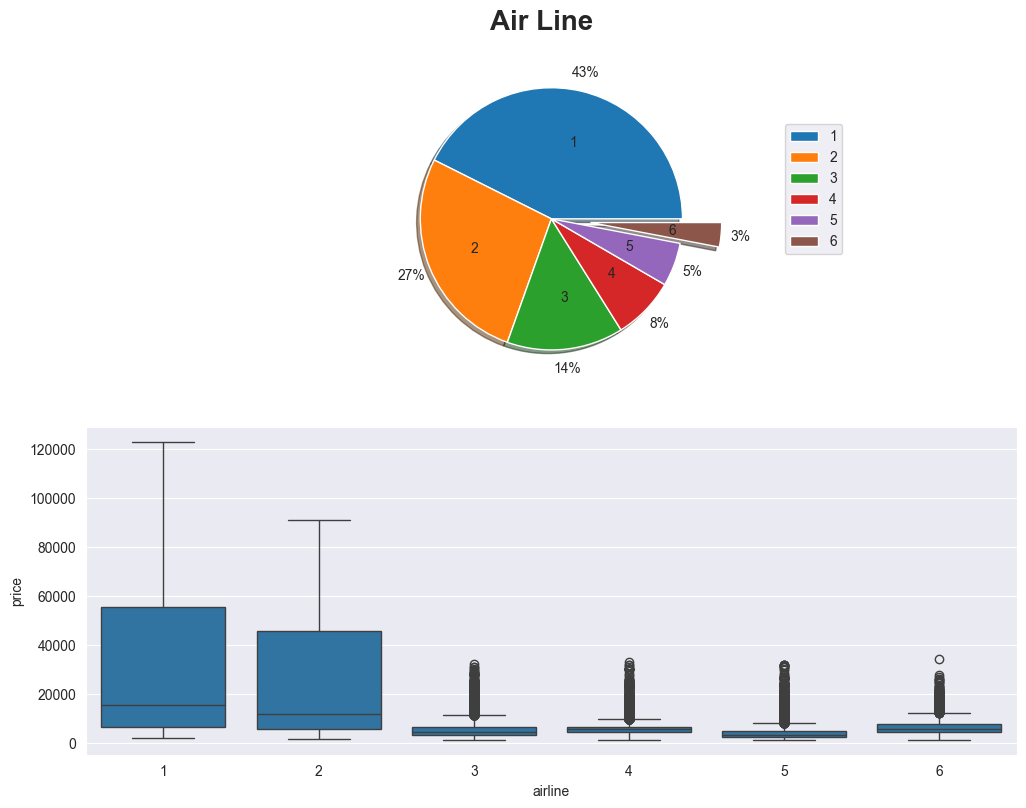

In [53]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('Air Line', fontsize=20, fontweight='bold')
plt.tight_layout()
# Top ax
labels = data.airline.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(data.airline.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.15, labeldistance=0.6, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='airline', y='price', data=data, ax=ax[1])

plt.show()

### flight

In [13]:
len(data.flight.value_counts())

1561

<div style="font-size:110%; font-weight:500; background-color:#d3def0">➡️ Becase of larg values of unique values,  i can not plot this column.</div>

<div style="font-size:110%; font-weight:500; background-color:#d3def0">➡️ Flight name is like a ID, so its not nessasary for modeling and will drop from dataframe.</div>

In [14]:
data.drop(columns='flight', inplace=True)

### source_city

In [15]:
data.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

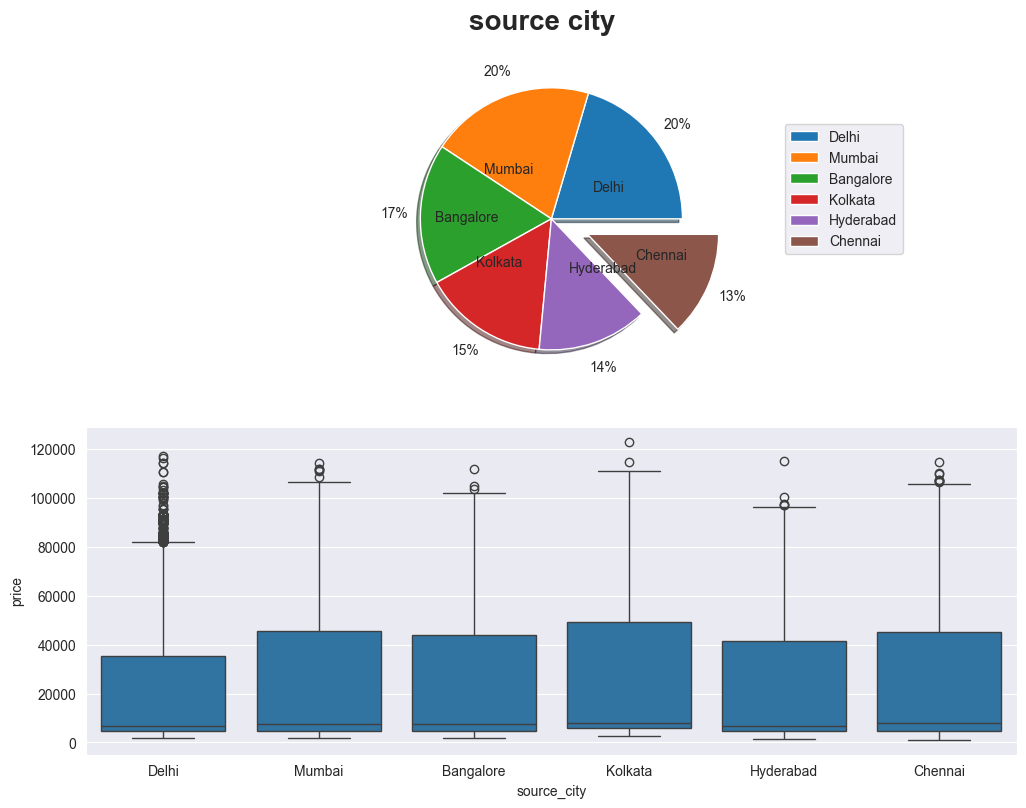

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('source city', fontsize=20, fontweight='bold')
plt.tight_layout()
# Top ax
labels = data.source_city.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(data.source_city.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='source_city', y='price', data=data, ax=ax[1])
plt.show()

### departure_time

In [17]:
data.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

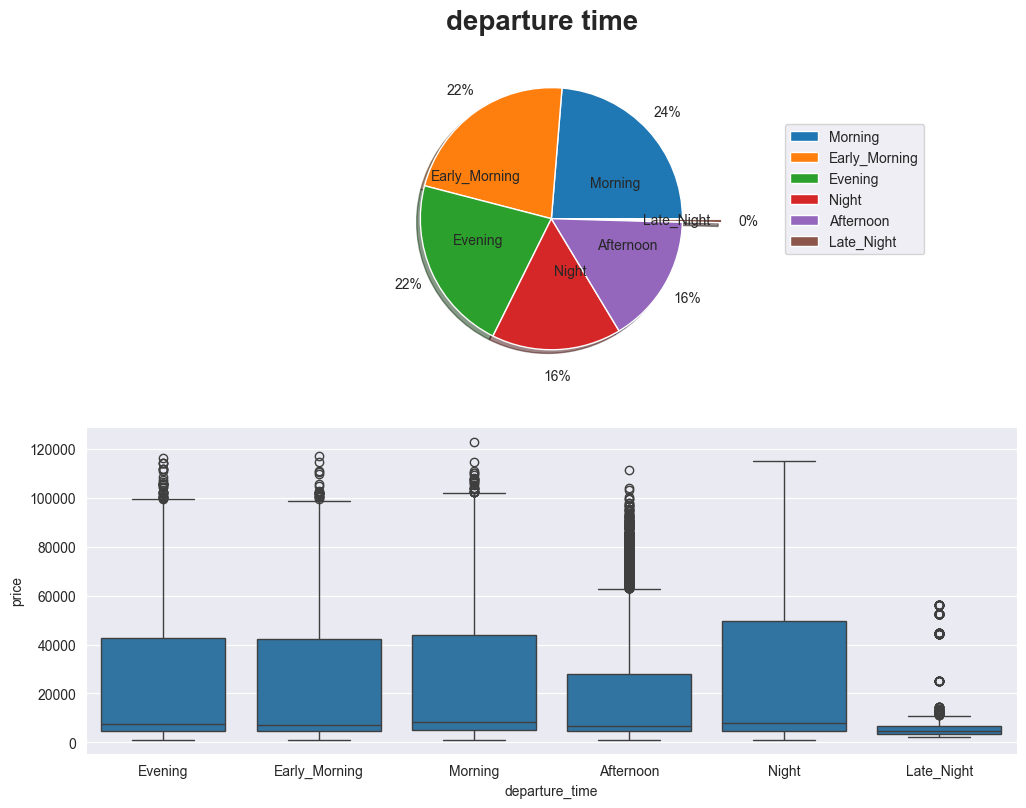

In [18]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('departure time', fontsize=20, fontweight='bold')
plt.tight_layout()
# Top ax
labels = data.departure_time.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(data.departure_time.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='departure_time', y='price', data=data, ax=ax[1])
plt.show()

### stops

In [19]:
data.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

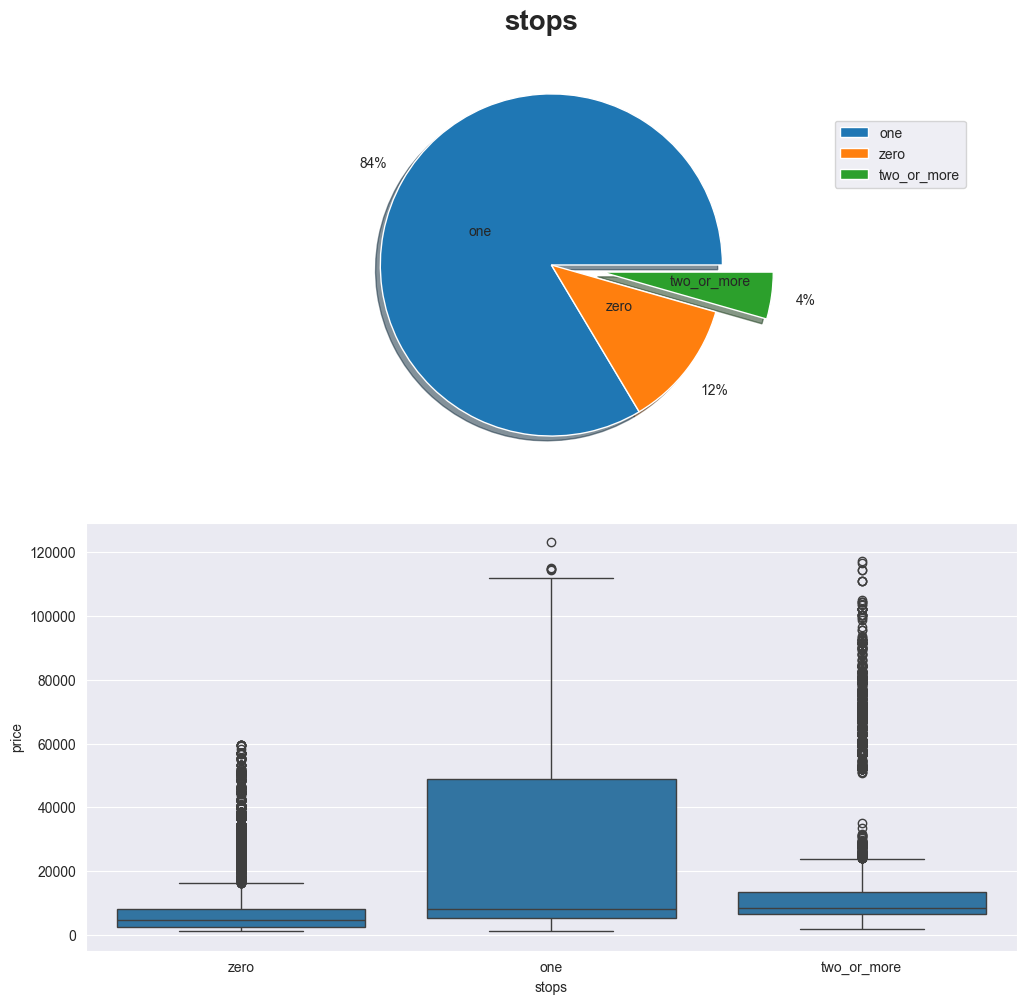

In [20]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('stops', fontsize=20, fontweight='bold')
plt.tight_layout()
# Top ax
labels = data.stops.value_counts().index.tolist()
explode = (0, 0, 0.3)
ax[0].pie(data.stops.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='stops', y='price', data=data, ax=ax[1])
plt.show()

### arrival_time

In [21]:
data.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

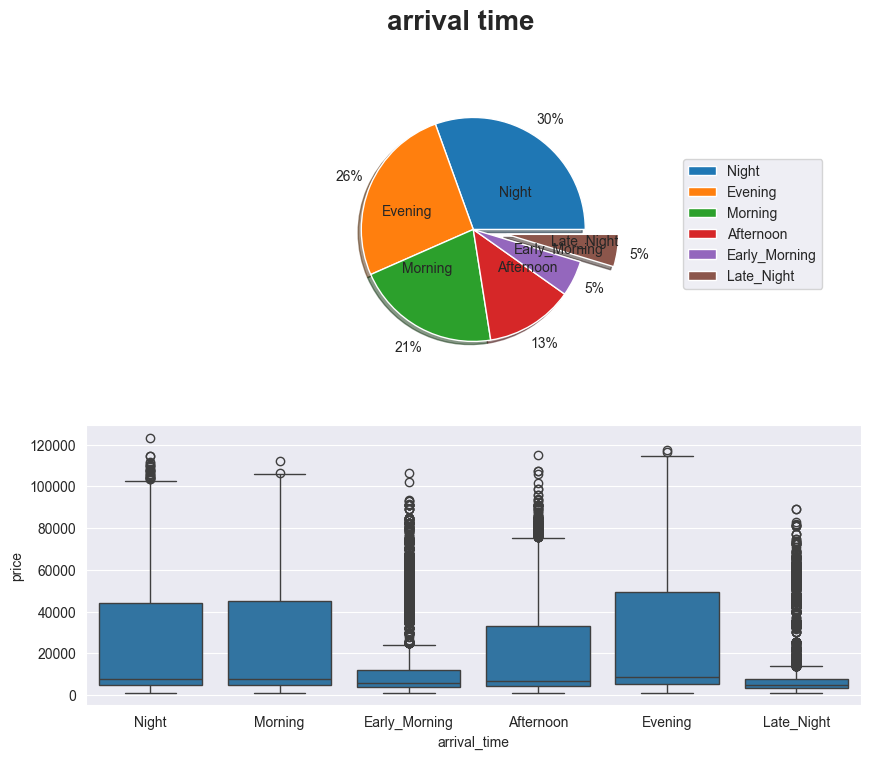

In [22]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('arrival time', fontsize=20, fontweight='bold')
# Top ax
labels = data.arrival_time.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(data.arrival_time.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='arrival_time', y='price', data=data, ax=ax[1])
plt.show()

### destination_city

In [23]:
data.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

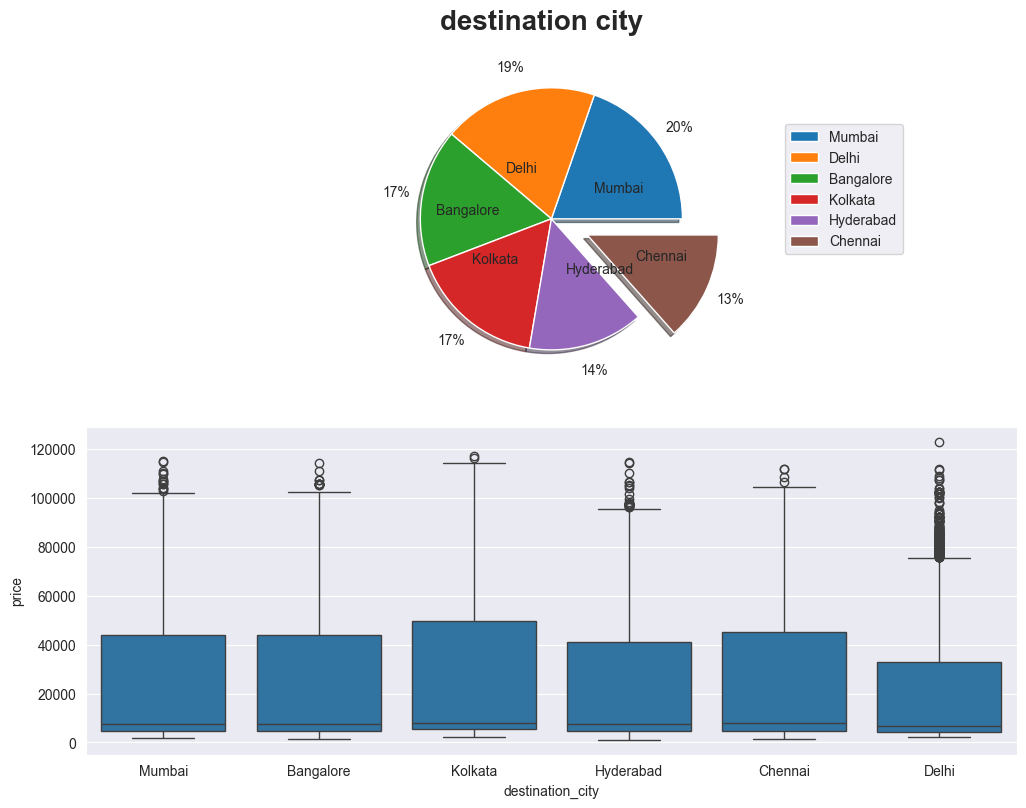

In [24]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('destination city', fontsize=20, fontweight='bold')
plt.tight_layout()
# Top ax
labels = data.destination_city.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(data.destination_city.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='destination_city', y='price', data=data, ax=ax[1])
plt.show()

### flight_class

In [25]:
data.flight_class.value_counts()

flight_class
Economy     206666
Business     93487
Name: count, dtype: int64

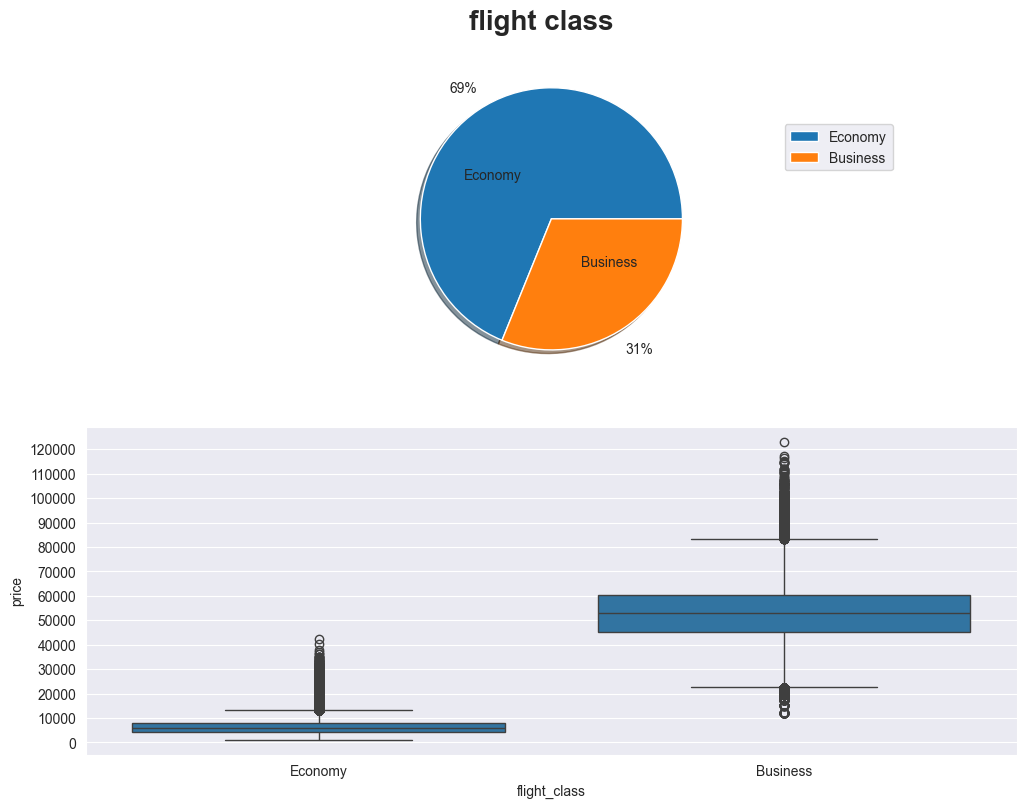

In [26]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('flight class', fontsize=20, fontweight='bold')
plt.tight_layout()
# Top ax
labels = data.flight_class.value_counts().index.tolist()
# explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(data.flight_class.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='flight_class', y='price', data=data, ax=ax[1]).set_yticks(np.arange(0, 130000, 10000))
plt.show()

### duration

In [27]:
len(data.duration.value_counts())

476

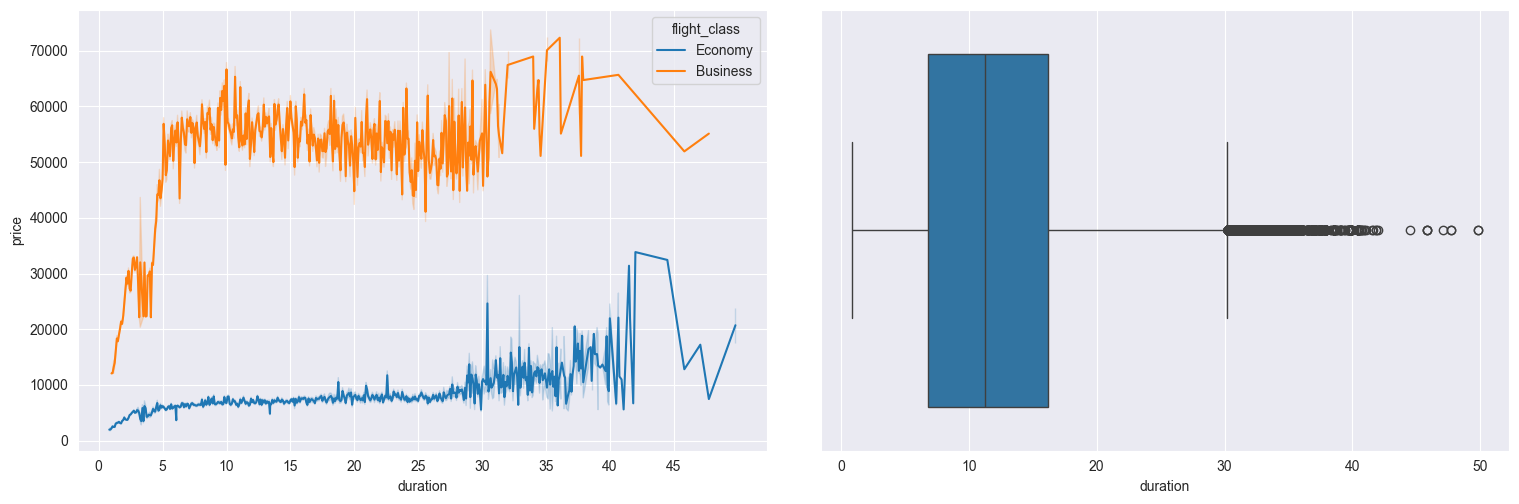

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.tight_layout()
# Left ax
sns.lineplot(x='duration', y='price', data=data, ax=ax[0], hue='flight_class').set_xticks(np.arange(0, 50, 5))
# Right AX
sns.boxplot(data=data, x='duration', ax=ax[1])
plt.show()

### days_left 

In [29]:
len(data.days_left.value_counts())

49

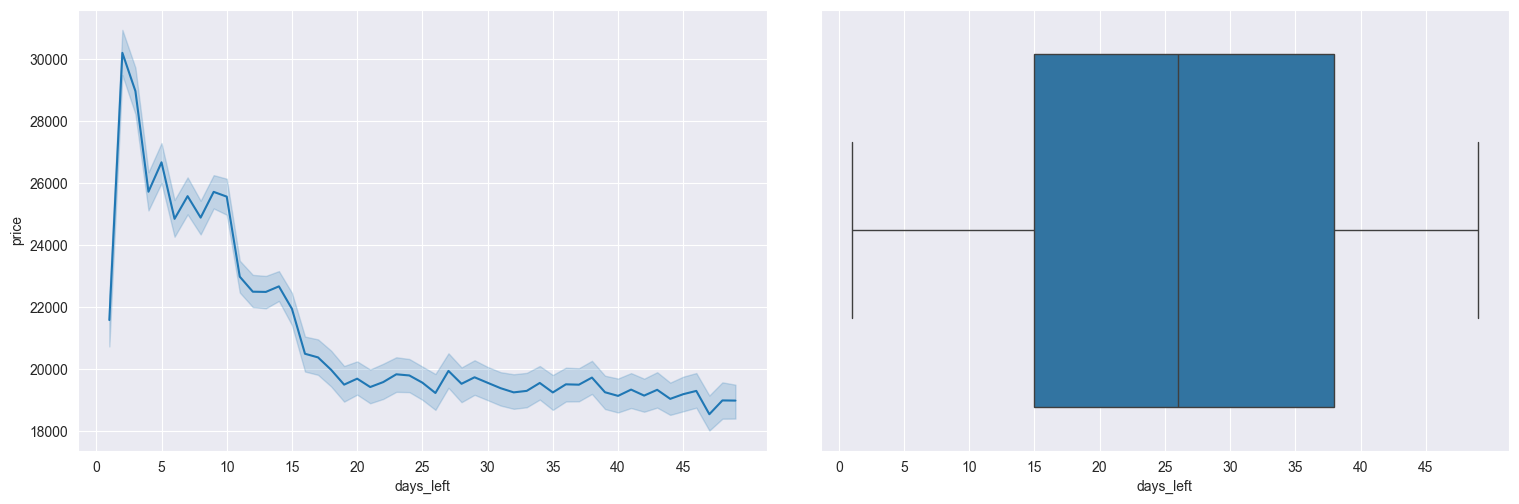

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.tight_layout()
# Left ax
sns.lineplot(x='days_left', y='price', data=data, ax=ax[0]).set_xticks(np.arange(0, 50, 5))
# Right AX
sns.boxplot(data=data, x='days_left', ax=ax[1]).set_xticks(np.arange(0, 50, 5))
plt.show()

### price

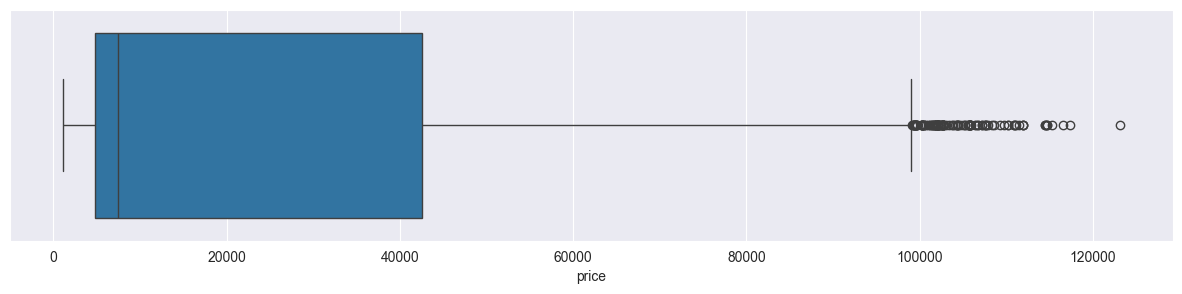

In [31]:
plt.figure(figsize=(15, 3))
sns.boxplot(data=data, x='price')
plt.show()

<a id="corr"></a>
## <b><span style="color:navy">✈️ Step 3.2 | </span><span style="color:red">Correlations</span></b>

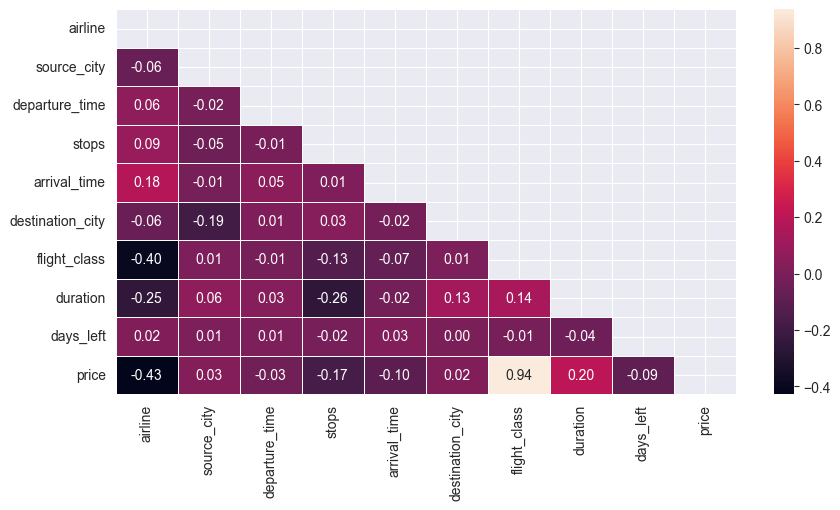

In [40]:
corr = data.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='white', mask=np.triu(corr))
plt.show()

<a id="prep"></a>
# <b><p style="background-image: url(https://i.postimg.cc/MpTLFhtf/wp9806504-network-desktop-wallpapers.jpg);background-size: cover;font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 4 | Preprocessing</p></b>

[🏠 Tabel of Contents](#content)

<a id="value"></a>
## <b><span style="color:navy">✈️ Step 4.1 | </span><span style="color:red">Value</span></b>

##  Replace string values with integer

In [32]:
data.airline = data.airline.replace(
    {
        'Vistara' : 1,
        'Air_India' : 2,
        'Indigo' : 3,
        'GO_FIRST' : 4,
        'AirAsia': 5,
        'SpiceJet' : 6  
    }
)

In [33]:
data.source_city = data.source_city.replace(
    {
        'Delhi' : 1,
        'Mumbai' : 2,
        'Bangalore' : 3,
        'Kolkata' : 4,
        'Hyderabad'  : 5,
        'Chennai' : 6
    }
)

In [34]:
data.departure_time = data.departure_time.replace(
    {
        'Morning' : 1,
        'Early_Morning' : 2, 
        'Evening' : 3,
        'Night' : 4,
        'Afternoon' : 5, 
        'Late_Night' : 6
    }
)

In [35]:
data.stops = data.stops.replace(
    {
        'one' : 1,
        'zero' : 2,
        'two_or_more' : 3
    }
)

In [36]:
data.arrival_time = data.arrival_time.replace(
    {
        'Night' : 1,
        'Evening' : 2,
        'Morning' : 3,
        'Afternoon' : 4,
        'Early_Morning' : 5,
        'Late_Night' : 6
    }
)

In [37]:
data.destination_city = data.destination_city.replace(
    {
        'Mumbai' : 1,
        'Delhi' : 2,
        'Bangalore' : 3,
        'Kolkata' : 4,
        'Hyderabad' : 5,
        'Chennai' : 6
    }
)

In [38]:
data.flight_class = data.flight_class.replace(
    {
        'Economy' : 1,
        'Business' :2
    }
)

In [39]:
data.describe()

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,2.153072,3.201487,2.794901,1.208480,2.498846,3.268316,1.311464,12.221021,26.004751,20889.660523
std,1.348357,1.684757,1.401659,0.503533,1.407841,1.688644,0.463093,7.191997,13.561004,22697.767366
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,1.000000,1105.000000
25%,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,6.830000,15.000000,4783.000000
50%,2.000000,3.000000,3.000000,1.000000,2.000000,3.000000,1.000000,11.250000,26.000000,7425.000000
75%,3.000000,5.000000,4.000000,1.000000,3.000000,5.000000,2.000000,16.170000,38.000000,42521.000000
max,6.000000,6.000000,6.000000,3.000000,6.000000,6.000000,2.000000,49.830000,49.000000,123071.000000


<a id="xy"></a>
## <b><span style="color:navy">✈️ Step 4.2 | </span><span style="color:red">Define X ,y</span></b>

In [41]:
X_temp = data.drop(columns='price')
y = data.price

<a id="norm"></a>
## <b><span style="color:navy">✈️ Step 4.3 | </span><span style="color:red">Normalization</span></b>

In [42]:
scaler = MinMaxScaler().fit_transform(X_temp)
X = pd.DataFrame(scaler, columns=X_temp.columns)

In [43]:
X.describe().T[['min', 'mean', 'std', '50%', 'max']].style.background_gradient(axis=1)

,min,mean,std,50%,max
airline,0.000000,0.230614,0.269671,0.200000,1.000000
source_city,0.000000,0.440297,0.336951,0.400000,1.000000
departure_time,0.000000,0.358980,0.280332,0.400000,1.000000
stops,0.000000,0.104240,0.251766,0.000000,1.000000
arrival_time,0.000000,0.299769,0.281568,0.200000,1.000000
destination_city,0.000000,0.453663,0.337729,0.400000,1.000000
flight_class,0.000000,0.311464,0.463093,0.000000,1.000000
duration,0.000000,0.232470,0.146775,0.212653,1.000000
days_left,0.000000,0.520932,0.282521,0.520833,1.000000


In [44]:
main_X = X.copy()

<a id="ml"></a>
# <b><p style="background-image: url(https://i.postimg.cc/MpTLFhtf/wp9806504-network-desktop-wallpapers.jpg);background-size: cover;font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 5 | Modeling</p></b>

[🏠 Tabel of Contents](#content)

<a id="lr"></a>
## <b><span style="color:navy">✈️ Step 5.1 | </span><span style="color:red">LinearRegression</span></b>

Best test_size : 0.15
Best R2Score : 0.8966402677524069
Best Mean Squared Error : 52819242.41679669


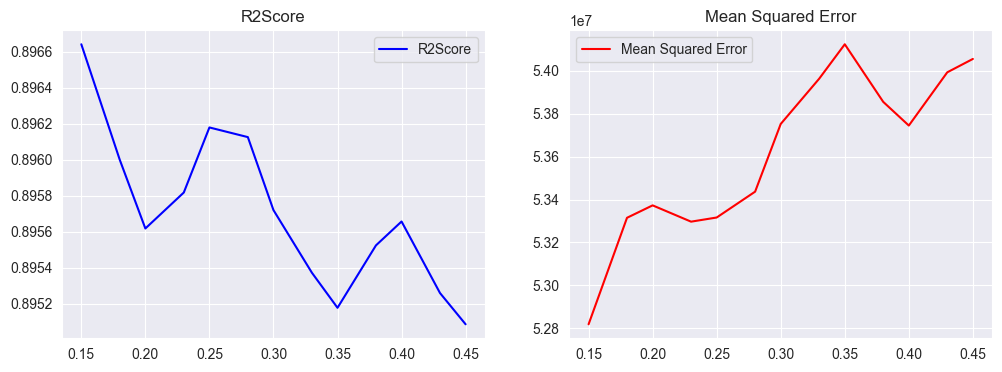

In [45]:
# Create a loop to find best test_size
test_list = []
mse_list = []
r2score_list = []
best_r2=0
best_mse=0
best_test=0

for tester in range(6, 19) :
    tester = round(0.025 * tester, 2)
    test_list.append(tester)
    #
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tester, random_state=0)
    #
    lr = LinearRegression().fit(X, y)
    y_pred_lr = lr.predict(X_test)
    r2score = metrics.r2_score(y_test, y_pred_lr)
    r2score_list.append(r2score)
    mse = metrics.mean_squared_error(y_test, y_pred_lr)
    mse_list.append(mse)
    #
    if r2score>best_r2 :
        best_r2 = r2score
        best_mse = mse
        best_test = tester
print(colored('Best test_size : {}'.format(best_test), 'blue'))
print(colored('Best R2Score : {}'.format(best_r2), 'blue'))
print(colored('Best Mean Squared Error : {}'.format(best_mse), 'blue'))

# Plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(test_list, r2score_list, c='blue', label='R2Score')
ax[0].set_title("R2Score")
ax[0].legend()

ax[1].plot(test_list, mse_list, c='red', label='Mean Squared Error')
ax[1].set_title("Mean Squared Error")
ax[1].legend()
plt.show()

### acc = 89.66%
### Use most relevant feature to target : <code>flight_class</code>  to increase accuracy

In [46]:
for power in range(2, 7) :
    new_col_name = 'flight_class^' + str(power)
    X[new_col_name] = pow(X.flight_class, power)
    #
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=best_test, random_state=0)
    #
    lr = LinearRegression().fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    r2score = metrics.r2_score(y_test, y_pred)
    diff = r2score-best_r2
    if r2score > best_r2 :
        best_r2 = r2score
        print(colored('{} improve r2score by {}'.format(new_col_name, diff), 'green'))
    else :
        X.drop(columns=[new_col_name], inplace=True)
        print(colored('{} Not improve r2score'.format(new_col_name), 'red'))


flight_class^2 Not improve r2score
flight_class^3 Not improve r2score
flight_class^4 Not improve r2score
flight_class^5 Not improve r2score
flight_class^6 Not improve r2score


In [47]:
columns = X.columns
for col in columns :
    new_col_name = 'flight_class*' + col
    X[new_col_name] = X.flight_class * X[col]
    #
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=best_test, random_state=0)
    #
    lr = LinearRegression().fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    r2score = metrics.r2_score(y_test, y_pred)
    diff = r2score-best_r2
    if (r2score > best_r2) and (diff>=0.001) :
        best_r2 = r2score
        print(colored('{} improve r2score by {}'.format(new_col_name, diff), 'green'))
    else :
        X.drop(columns=[new_col_name], inplace=True)
        print(colored('{} Not improve r2score'.format(new_col_name), 'red'))


flight_class*airline improve r2score by 0.008893798233847172
flight_class*source_city Not improve r2score
flight_class*departure_time Not improve r2score
flight_class*stops improve r2score by 0.010364295426905201
flight_class*arrival_time Not improve r2score
flight_class*destination_city Not improve r2score
flight_class*flight_class Not improve r2score
flight_class*duration Not improve r2score
flight_class*days_left Not improve r2score


In [48]:
lr_r2 = best_r2
print(colored('Liear Legresion R2Score = {}'.format(round(lr_r2, 3)), 'green'))

Liear Legresion R2Score = 0.916


<a id="tree"></a>
## <b><span style="color:navy">✈️ Step 5.2 | </span><span style="color:red">DecisionTreeRegressor</span></b>

In [49]:
parameters = {
    'splitter' : ['best', 'random'],
    'max_features' : [None, 8, 7, 6, 5],
}

X_train, X_test, y_train, y_test = train_test_split(main_X, y, test_size=tester, random_state=0)


tree = DecisionTreeRegressor()
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=20).fit(X_train, y_train)

print(colored('Tuned Hyper Parameters :\n{}'.format(tree_cv.best_params_), 'blue'))

Tuned Hyper Parameters :
{'max_features': None, 'splitter': 'best'}


In [50]:
tree = DecisionTreeRegressor(**tree_cv.best_params_).fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
tree_r2 = metrics.r2_score(y_test, y_pred_tree)
print(colored('DecisionTreeRegressor R2Score = {}'.format(round(tree_r2, 3)), 'green'))

DecisionTreeRegressor R2Score = 0.975


<a id="rf"></a>
## <b><span style="color:navy">✈️ Step 5.3 | </span><span style="color:red">RandomForestRegressor</span></b>

In [51]:
X_train, X_test, y_train, y_test = train_test_split(main_X, y, test_size=tester, random_state=0)

rf = RandomForestRegressor(n_estimators=500, max_features=8, n_jobs=-1).fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_r2 = metrics.r2_score(y_test, y_pred_rf)
print(colored('RandomForestRegressor R2Score = {}'.format(round(rf_r2, 3)), 'green'))

RandomForestRegressor R2Score = 0.985


<a id="result"></a>
## <b><span style="color:navy">✈️ Step 4.4 | </span><span style="color:red">Result</span></b>

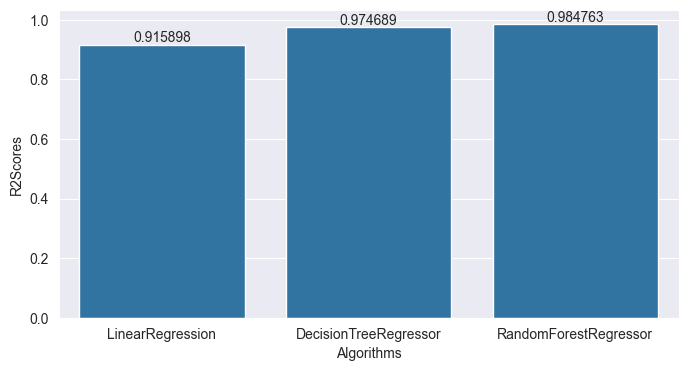

In [52]:
result = pd.DataFrame({
    'Algorithms' : ['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor'],
    'R2Scores' : [lr_r2, tree_r2, rf_r2]
})
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='Algorithms', y='R2Scores', data=result)
ax.bar_label(ax.containers[0])
plt.show()

<a id="author"></a>
<div style="border:3px solid navy; border-radius:30px; padding: 15px; background-size: cover; font-size:100%; text-align:left; background-image: url(https://i.postimg.cc/sXwGWcwC/download.jpg); background-size: cover">

<h4 align="left"><span style="font-weight:700; font-size:150%"><font color=#d10202>Author:</font><font color=navy> Nima Pourmoradi</font></span></h4>
<h6 align="left"><font color=#ff6200><a href='https://github.com/NimaPourmoradi'>github: https://github.com/NimaPourmoradi</font></h6>
<h6 align="left"><font color=#ff6200><a href='https://www.kaggle.com/nimapourmoradi'>kaggle : https://www.kaggle.com/nimapourmoradi</a></font></h6>
<h6 align="left"><font color=#ff6200><a href='https://www.linkedin.com/in/nima-pourmoradi-081949288/'>linkedin : www.linkedin.com/in/nima-pourmoradi</a></font></h6>
<h6 align="left"><font color=#ff6200><a href='https://t.me/Nima_Pourmoradi'>Telegram : https://t.me/Nima_Pourmoradi</a></font></h6>